**Step 1: Exploratory Data Analysis (EDA)**
Check for missing values

Basic statistics

Outlier detection

Correlation and distribution plots

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train (3).csv")

In [61]:
df.head(1)

,x,y
0,24.0,21.549452


In [62]:
type(df.shape),df.shape

(tuple, (700, 2))

In [63]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


NoneType

In [64]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 x    0
y    1
dtype: int64


In [65]:
df.describe(),   type(df.describe())

(                 x           y
 count   700.000000  699.000000
 mean     54.985939   49.939869
 std     134.681703   29.109217
 min       0.000000   -3.839981
 25%      25.000000   24.929968
 50%      49.000000   48.973020
 75%      75.000000   74.929911
 max    3530.157369  108.871618,
 pandas.core.frame.DataFrame)

Text(0.5, 1.0, 'Distribution of x')

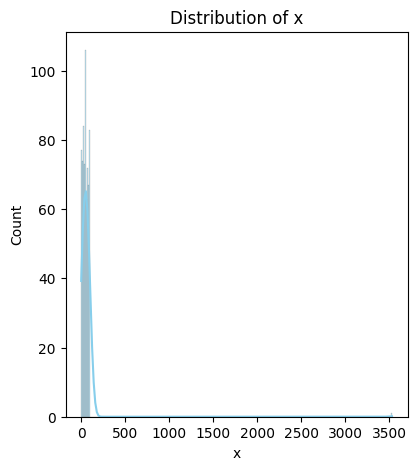

In [66]:
# Plot distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['x'], kde=True, color='skyblue')
plt.title("Distribution of x")

Text(0.5, 1.0, 'Distribution of y')

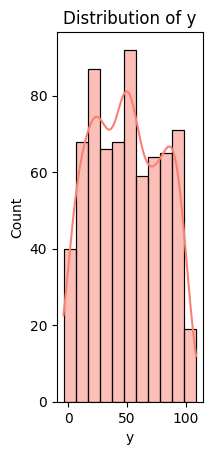

In [67]:
plt.subplot(1, 3, 2)
sns.histplot(df['y'], kde=True, color='salmon')
plt.title("Distribution of y")

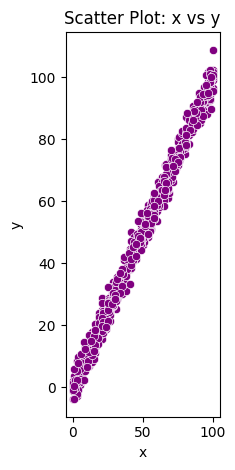

In [68]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='x', y='y', data=df, color='purple')
plt.title("Scatter Plot: x vs y")
plt.tight_layout()
plt.show()

**Step 2: Data Preprocessing**
 Handle missing values

Handle outliers (if necessary)

Feature scaling (if needed)

In [69]:
# Fill missing y with median (or use df.dropna())
df['y'] = df['y'].fillna(df['y'].median())

In [70]:
df.isnull().sum()

,0
x,0
y,0


**# Detect outliers using IQR**

In [71]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [72]:
Q1,Q3,IQR

(x    25.00000
 y    24.98583
 Name: 0.25, dtype: float64,
 x    75.000000
 y    74.880631
 Name: 0.75, dtype: float64,
 x    50.000000
 y    49.894801
 dtype: float64)

In [73]:
Q1

,0.25
x,25.00000
y,24.98583


In [74]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


In [75]:
# Count True/False values across all outlier flags
outliers.stack().value_counts()


,count
False,1399
True,1


In [79]:
df.shape

(700, 2)

In [76]:
outliers.value_counts()

,,count
x,y,
False,False,699
True,False,1


In [77]:
print("Outliers count:\n", outliers.sum())

Outliers count:
 x    1
y    0
dtype: int64


In [78]:
# Count of outliers per column
outliers.sum()


,0
x,1
y,0


**Step 3: Modeling**
Train/test split

Try multiple models (e.g., Linear Regression, Random Forest, etc.)

Hyperparameter tuning

Cross-validation

Accuracy and error metrics

**Train/test split**

In [80]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df[['x']]         # Features
y = df['y']           # Target

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
X_train

,x
82,11.0
51,44.0
220,54.0
669,24.0
545,29.0
...,...
71,64.0
106,71.0
270,46.0
435,28.0


In [83]:
X_train.shape

(560, 1)

**models**

In [84]:
from sklearn.linear_model import LinearRegression

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)


In [85]:
y_pred

array([52.31790229, 52.2111352 , 49.47077982, 51.81965586, 49.36401272,
       52.31790229, 49.39960175, 50.21814947, 51.42817652, 52.06877908,
       50.92993008, 48.97253338, 50.57403978, 48.93694435, 48.83017726,
       49.89784819, 51.6417107 , 48.7589992 , 50.00461528, 51.6417107 ,
       52.24672423, 50.96551912, 52.24672423, 49.64872497, 48.97253338,
       49.07930047, 49.79108109, 49.25724563, 51.46376555, 50.64521784,
       51.1790533 , 48.93694435, 51.57053264, 50.75198493, 50.60962881,
       49.79108109, 49.32842369, 49.57754691, 51.99760101, 49.71990303,
       48.83017726, 48.93694435, 51.10787524, 50.32491656, 50.43168365,
       48.86576629, 50.82316299, 50.96551912, 49.00812241, 49.00812241,
       51.85524489, 50.64521784, 50.89434105, 49.32842369, 50.57403978,
       51.6417107 , 49.54195788, 50.43168365, 50.1469714 , 50.2537385 ,
       49.64872497, 50.43168365, 49.32842369, 48.90135532, 50.64521784,
       49.43519078, 49.25724563, 49.07930047, 52.13995714, 49.18

**Hyperparamete**r

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Grid search with cross-validation
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [88]:
# Best model
best_ridge = grid.best_estimator_
print("Best Ridge alpha:", grid.best_params_)

Best Ridge alpha: {'alpha': 100.0}


**Cross-validation**

In [89]:
from sklearn.model_selection import cross_val_score

# CV for linear regression
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())


Cross-Validation R2 Scores: [ 2.58763864e-03 -1.06479880e+02  6.94891144e-02  6.99950203e-02
  6.25771317e-02]
Mean CV R2: -21.255046135187772


**Accuracy and error metrics**

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 25.80833145699661
MSE: 894.2205356482548
RMSE: 29.90352045576331
R² Score: 0.053280715482223906


 **Step 4: Evaluation**
Residual analysis

Compare model performance

Visualize predictions vs actuals

**Residual analysis**

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions from best Ridge model
ridge_pred = grid.predict(X_test)

# Residuals
residuals = y_test - ridge_pred

In [94]:
ridge_pred[0]

np.float64(52.31789011142294)

In [97]:
residuals

,y
158,44.305389
500,42.085211
396,-32.335279
155,35.001673
321,-32.027208
...,...
24,31.279252
218,31.380146
431,15.697353
281,21.339066


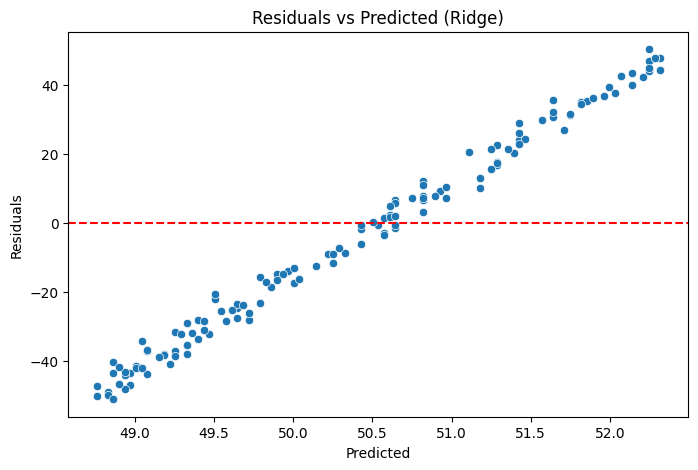

In [98]:
# Residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=ridge_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Ridge)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

 **Compare Model Performance (Linear vs Ridge)**

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear model predictions
lr_pred = lr.predict(X_test)

In [100]:
lr_pred

array([52.31790229, 52.2111352 , 49.47077982, 51.81965586, 49.36401272,
       52.31790229, 49.39960175, 50.21814947, 51.42817652, 52.06877908,
       50.92993008, 48.97253338, 50.57403978, 48.93694435, 48.83017726,
       49.89784819, 51.6417107 , 48.7589992 , 50.00461528, 51.6417107 ,
       52.24672423, 50.96551912, 52.24672423, 49.64872497, 48.97253338,
       49.07930047, 49.79108109, 49.25724563, 51.46376555, 50.64521784,
       51.1790533 , 48.93694435, 51.57053264, 50.75198493, 50.60962881,
       49.79108109, 49.32842369, 49.57754691, 51.99760101, 49.71990303,
       48.83017726, 48.93694435, 51.10787524, 50.32491656, 50.43168365,
       48.86576629, 50.82316299, 50.96551912, 49.00812241, 49.00812241,
       51.85524489, 50.64521784, 50.89434105, 49.32842369, 50.57403978,
       51.6417107 , 49.54195788, 50.43168365, 50.1469714 , 50.2537385 ,
       49.64872497, 50.43168365, 49.32842369, 48.90135532, 50.64521784,
       49.43519078, 49.25724563, 49.07930047, 52.13995714, 49.18

In [101]:
# Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("R²:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Ridge Regression", y_test, ridge_pred)


Linear Regression
R²: 0.053280715482223906
MSE: 894.2205356482548
RMSE: 29.90352045576331

Ridge Regression
R²: 0.05328014824577432
MSE: 894.2210714295471
RMSE: 29.90352941426057


**Visualize Predictions vs Actuals**

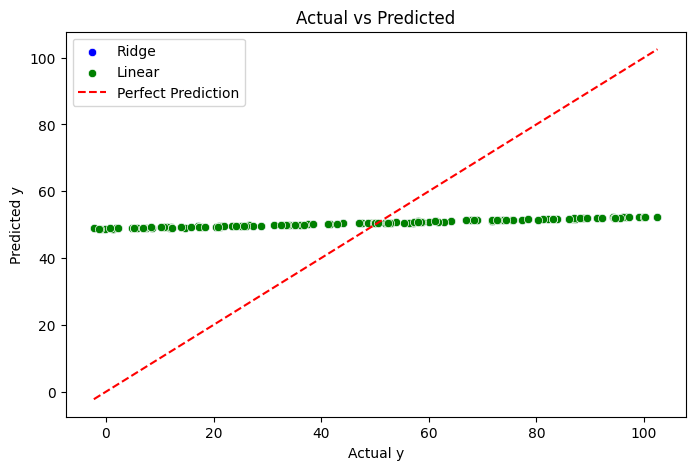

In [102]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=ridge_pred, color="blue", label="Ridge")
sns.scatterplot(x=y_test, y=lr_pred, color="green", label="Linear")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
